# Final Project

Group Members: Mary Vanco, Krushi Patel, Swetha Manupati, Vishakha Kamothi, Namratha Peddamalla  
Dataset: https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset

This analysis examines online sales data using Python to uncover key insights. It involves cleaning the data to ensure accuracy, manipulating it for better structure, and creating visualizations to identify trends and patterns. The findings aim to help businesses optimize strategies and make data-driven decisions.

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
#read in dataset
df = pd.read_csv("online_sales_dataset.csv")

## Explore and Clean Data

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [25]:
df.shape #this dataset has 49,782 rows and 17 columns

(49782, 17)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [27]:
df.describe() # Checking for basic statistics (mean, median, etc.)

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [28]:
df.isnull().sum() #a couple columns have null values

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [29]:
per_missing = df.isnull().sum()*100/len(df)
per_missing #percentage of missing values for each column

InvoiceNo            0.000000
StockCode            0.000000
Description          0.000000
Quantity             0.000000
InvoiceDate          0.000000
UnitPrice            0.000000
CustomerID           9.999598
Country              0.000000
Discount             0.000000
PaymentMethod        0.000000
ShippingCost         4.999799
Category             0.000000
SalesChannel         0.000000
ReturnStatus         0.000000
ShipmentProvider     0.000000
WarehouseLocation    7.000522
OrderPriority        0.000000
dtype: float64

In [30]:
#Handling missing values
df['ShippingCost'] = df['ShippingCost'].fillna(df['ShippingCost'].median())
df = df.dropna(subset=['CustomerID'])
df['WarehouseLocation'] = df['WarehouseLocation'].fillna('Unknown')

In [31]:
df.isnull().sum() #checking to make sure there's no more missing values

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

In [32]:
# Check for duplicates
print(f'Duplicates in the data: {df.duplicated().sum()}')

Duplicates in the data: 0


### Dataset Correction

In [33]:
df.groupby(["Category","Description"]).size()

Category     Description   
Accessories  Backpack          825
             Blue Pen          788
             Desk Lamp         814
             Headphones        780
             Notebook          833
             Office Chair      813
             T-shirt           784
             USB Cable         799
             Wall Clock        856
             White Mug         828
             Wireless Mouse    806
Apparel      Backpack          794
             Blue Pen          821
             Desk Lamp         825
             Headphones        823
             Notebook          763
             Office Chair      809
             T-shirt           823
             USB Cable         848
             Wall Clock        825
             White Mug         767
             Wireless Mouse    793
Electronics  Backpack          811
             Blue Pen          813
             Desk Lamp         811
             Headphones        827
             Notebook          795
             Office Chair  

In [34]:
#Correcting incorrect category mapping
Category = {
    'Wall Clock': 'Accessory',
    'Desk Lamp':'Accessory',
    'White Mug': 'Accessory',
    'Backpack': 'Accessory',

    'T-shirt': 'Apparel',

    'Headphones': 'Electronics',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',

    'Office Chair': 'Furniture',

    'Notebook': 'Stationery',
    'Blue Pen': 'Stationery',
}
df['Category'] = df['Description'].map(Category)

In [35]:
df.groupby(["Category","Description"]).size()

Category     Description   
Accessory    Backpack          4122
             Desk Lamp         4103
             Wall Clock        4159
             White Mug         4091
Apparel      T-shirt           4050
Electronics  Headphones        4058
             USB Cable         4130
             Wireless Mouse    3975
Furniture    Office Chair      4065
Stationery   Blue Pen          4036
             Notebook          4015
dtype: int64

## Exploratory Data Analysis

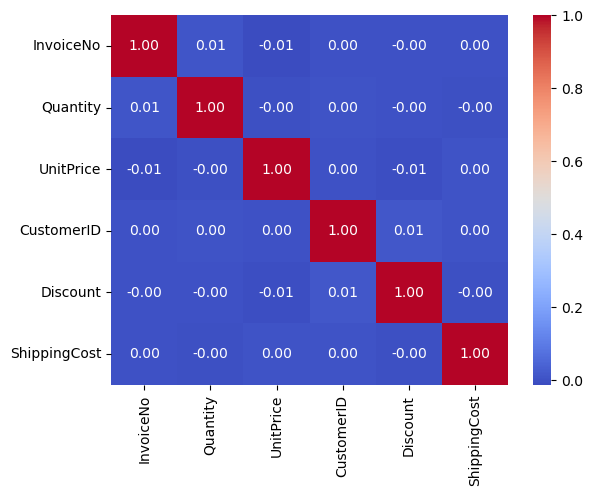

In [36]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Plot correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

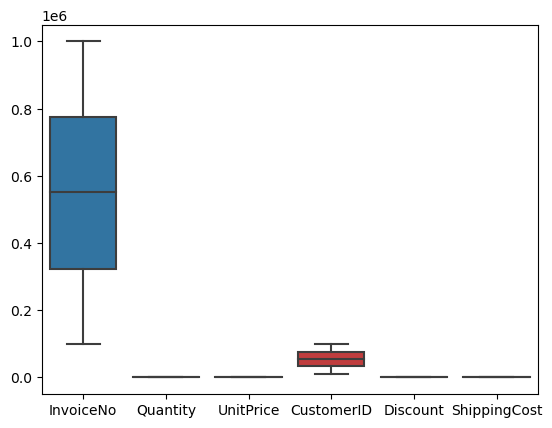

In [37]:
# Create a boxplot for all numeric columns
sns.boxplot(data=numeric_data)
plt.show()

In [38]:
# Fill missing values in 'Description' with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# Drop rows with missing values in critical columns
df = df.dropna(subset=['UnitPrice', 'CustomerID'])

## Product Quantities

Description
Wall Clock        103904
USB Cable         103609
Backpack          102590
White Mug         102567
Desk Lamp         101943
Office Chair      101076
T-shirt           100488
Wireless Mouse    100272
Blue Pen          100163
Notebook           99453
Name: Quantity, dtype: int64


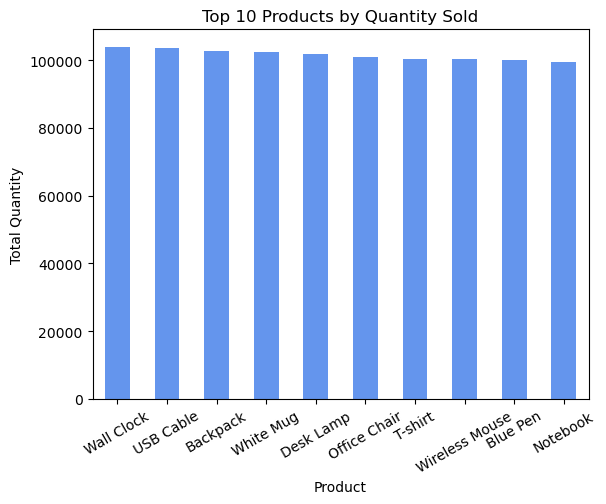

In [41]:
# Filter out rows with negative quantities
df = df[df['Quantity'] > 0]

# Group by product and calculate total quantity
product_quantities = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Display the top 10 products by quantity sold
print(product_quantities.head(10))

# Bar chart of top 10 products by quantity
product_quantities.head(10).plot(kind='bar', color='cornflowerblue')
plt.ylabel('Total Quantity')
plt.xlabel('Product')
plt.xticks(rotation=30)
plt.title('Top 10 Products by Quantity Sold')
plt.show()

## Analyzing Revenue

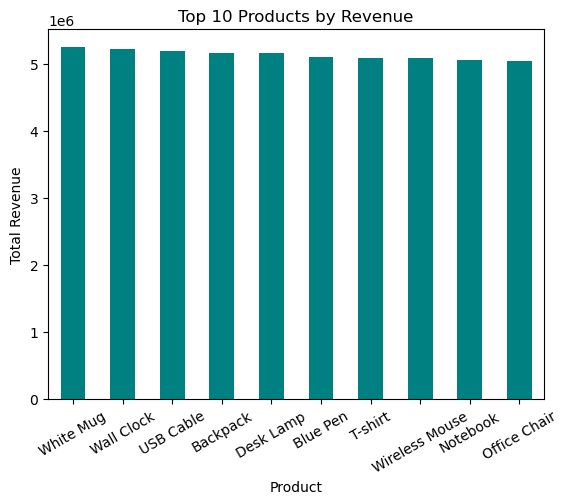

In [43]:
# Create a revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by product and calculate total revenue
revenue_data = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Bar chart of top 10 products by revenue
revenue_data.head(10).plot(kind='bar', color='teal')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=30)
plt.title('Top 10 Products by Revenue')
plt.show()

## Country Analysis

In [47]:
df['Country'].value_counts()

France            3820
Sweden            3771
Germany           3763
Netherlands       3753
Portugal          3747
Belgium           3745
Norway            3740
United Kingdom    3735
Spain             3700
Australia         3698
United States     3690
Italy             3642
Name: Country, dtype: int64

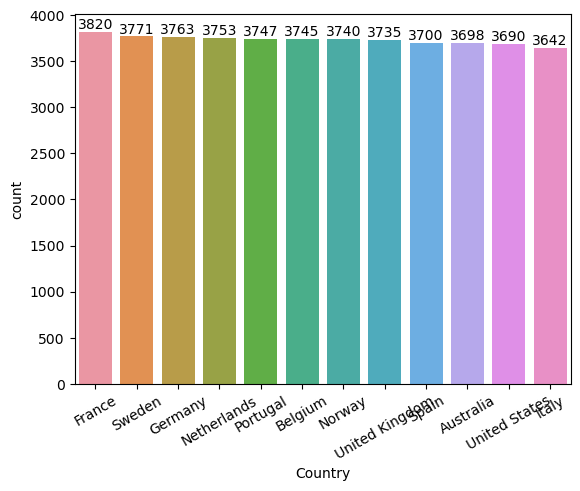

In [51]:
#Number of orders by country
country_counts = sns.countplot(x=df['Country'], order =df['Country'].value_counts(ascending=False).index)
count_values = df['Country'].value_counts(ascending=False).values
country_counts.bar_label(container=country_counts.containers[0], labels=count_values)
plt.xticks(rotation=30)
plt.show()

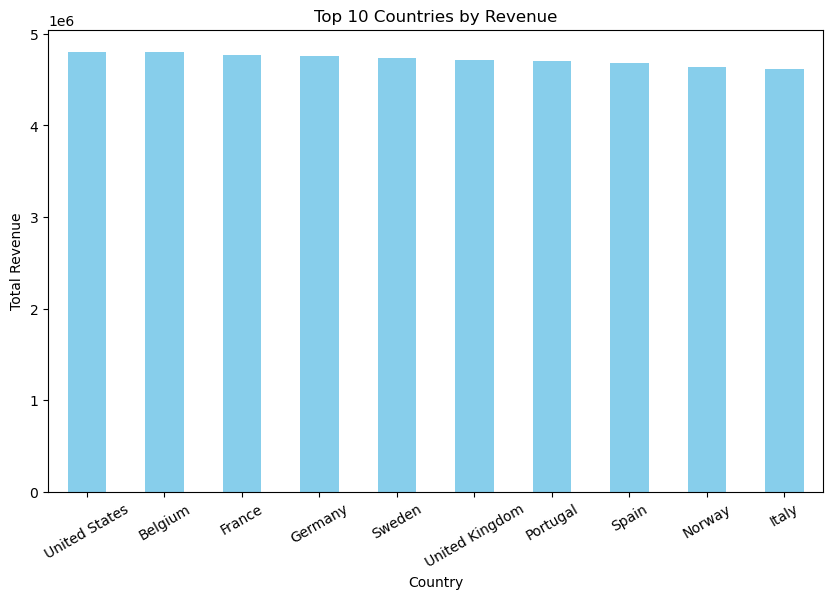

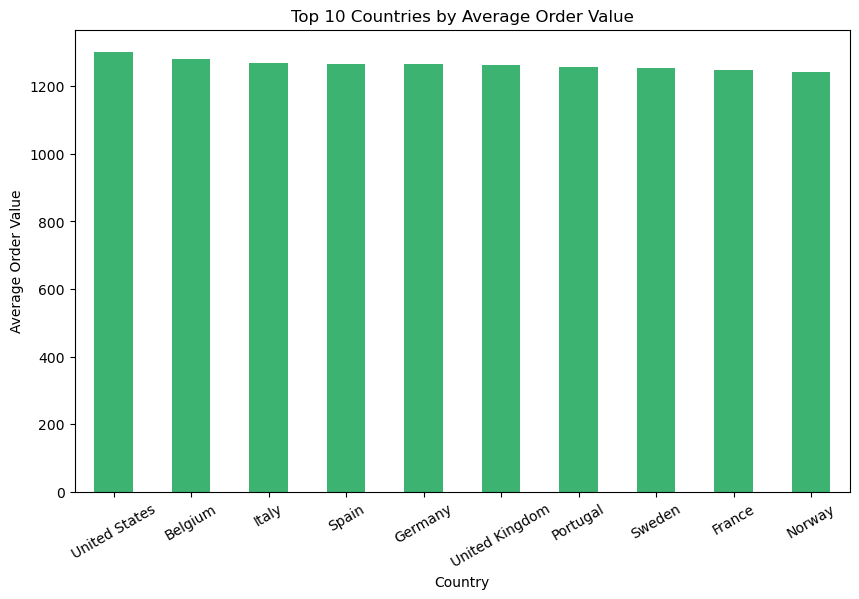

In [52]:
# Total revenue by country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Average order value by country
country_aov = df.groupby('Country')['Revenue'].mean().sort_values(ascending=False)

# Plot top 10 countries by revenue
plt.figure(figsize=(10, 6))
country_revenue.head(10).plot(kind='bar', color='skyblue')
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.title('Top 10 Countries by Revenue')
plt.xticks(rotation=30)
plt.show()

# Plot top 10 countries by AOV
plt.figure(figsize=(10, 6))
country_aov.head(10).plot(kind='bar', color='mediumseagreen')
plt.ylabel('Average Order Value')
plt.xlabel('Country')
plt.title('Top 10 Countries by Average Order Value')
plt.xticks(rotation=30)
plt.show()

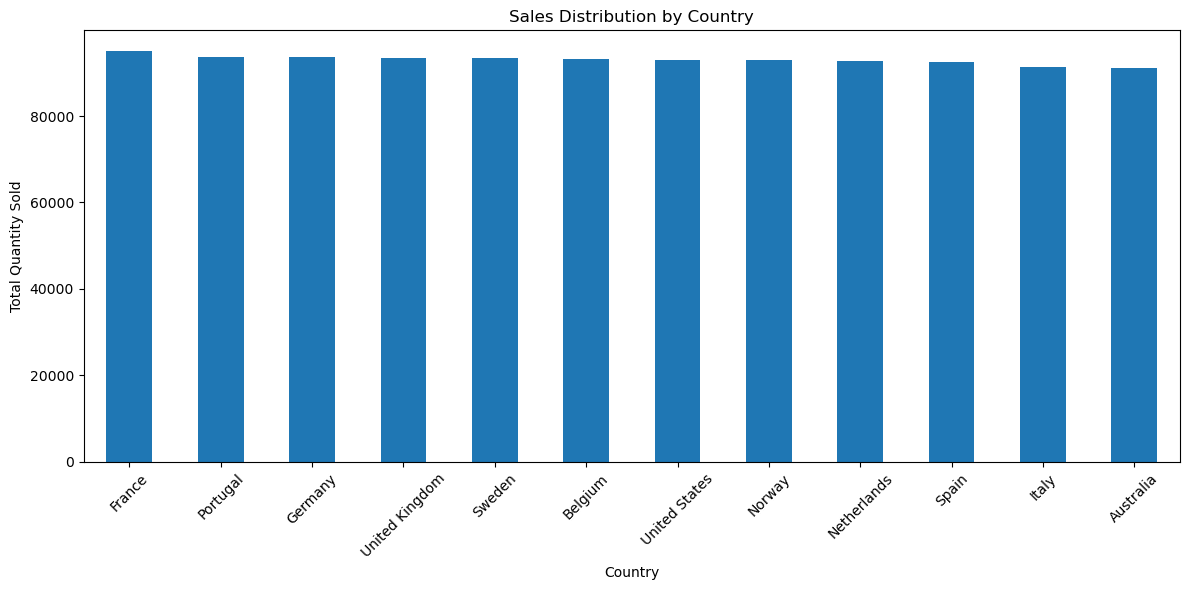

In [56]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar', title='Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

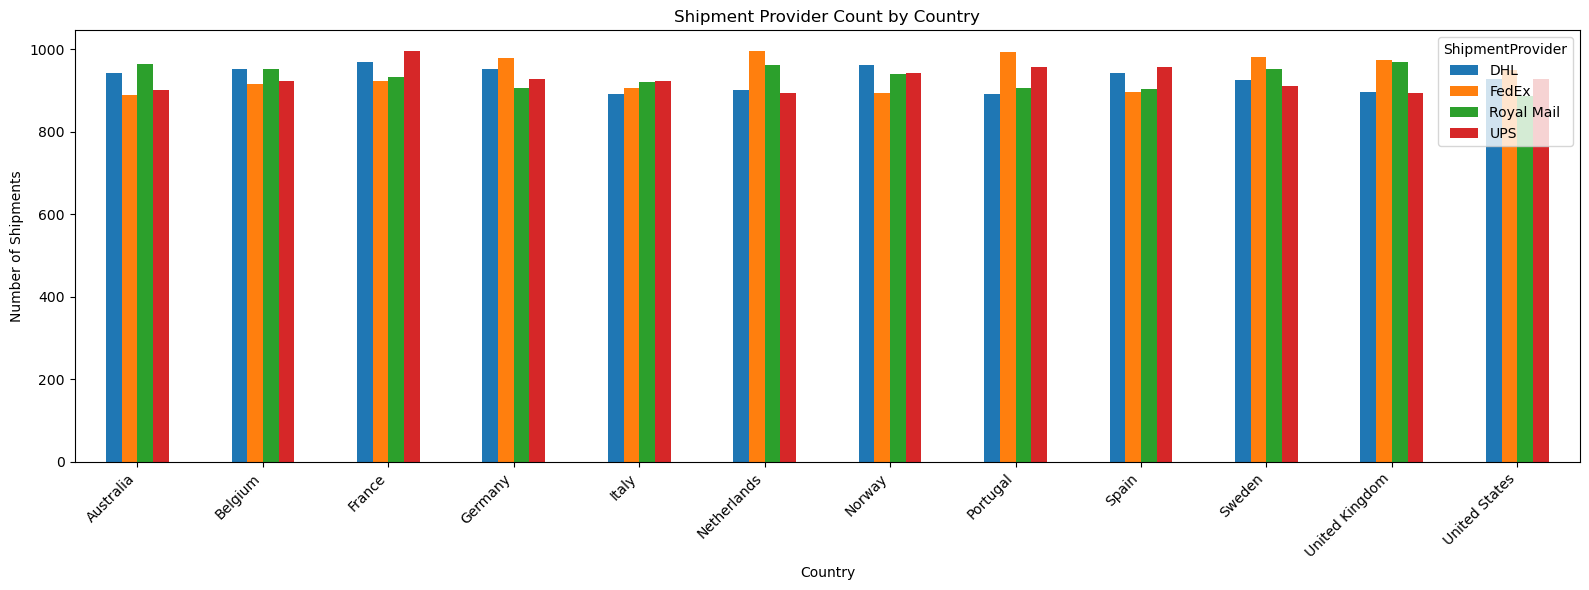

In [64]:
country_wise_shipmentProvider = df.groupby('Country')["ShipmentProvider"].value_counts()

country_wise_shipmentProvider.unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Shipment Provider Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

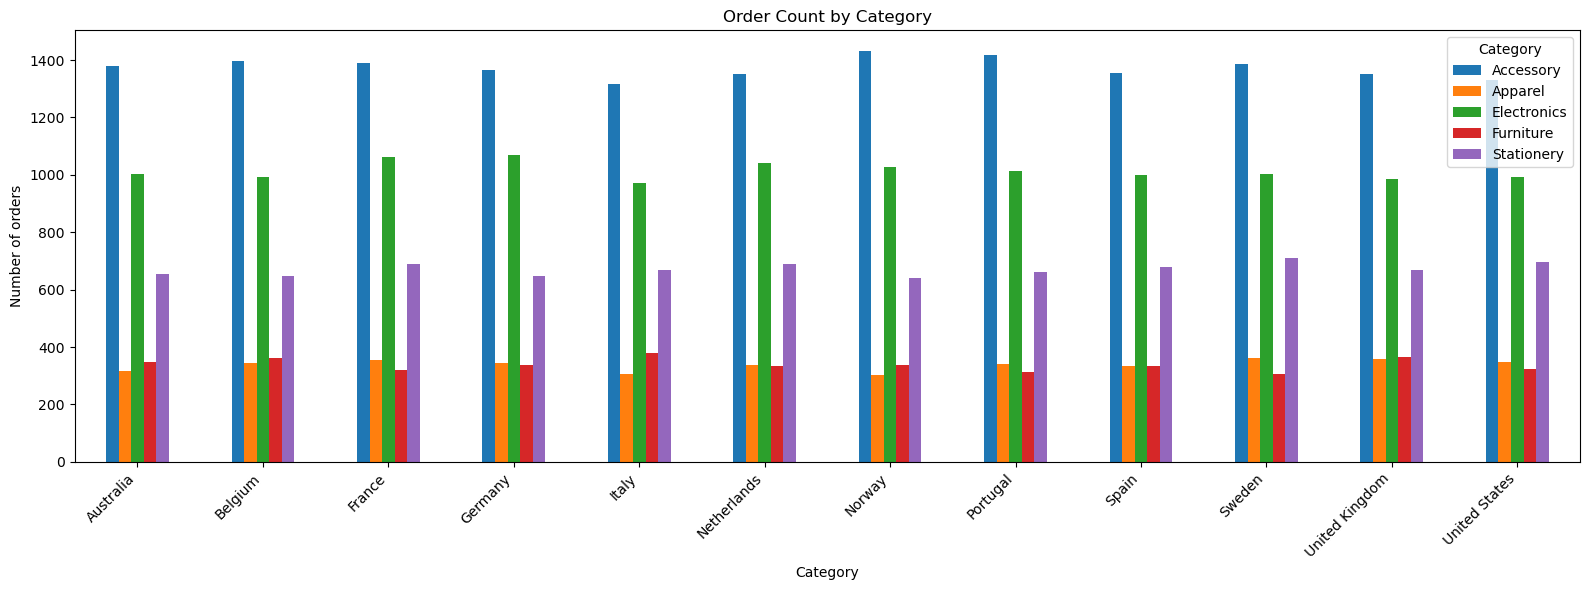

In [65]:
category_wise_orders_in_country = df.groupby(['Country', 'Category'])['InvoiceNo'].count()

category_wise_orders_in_country.unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Order Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

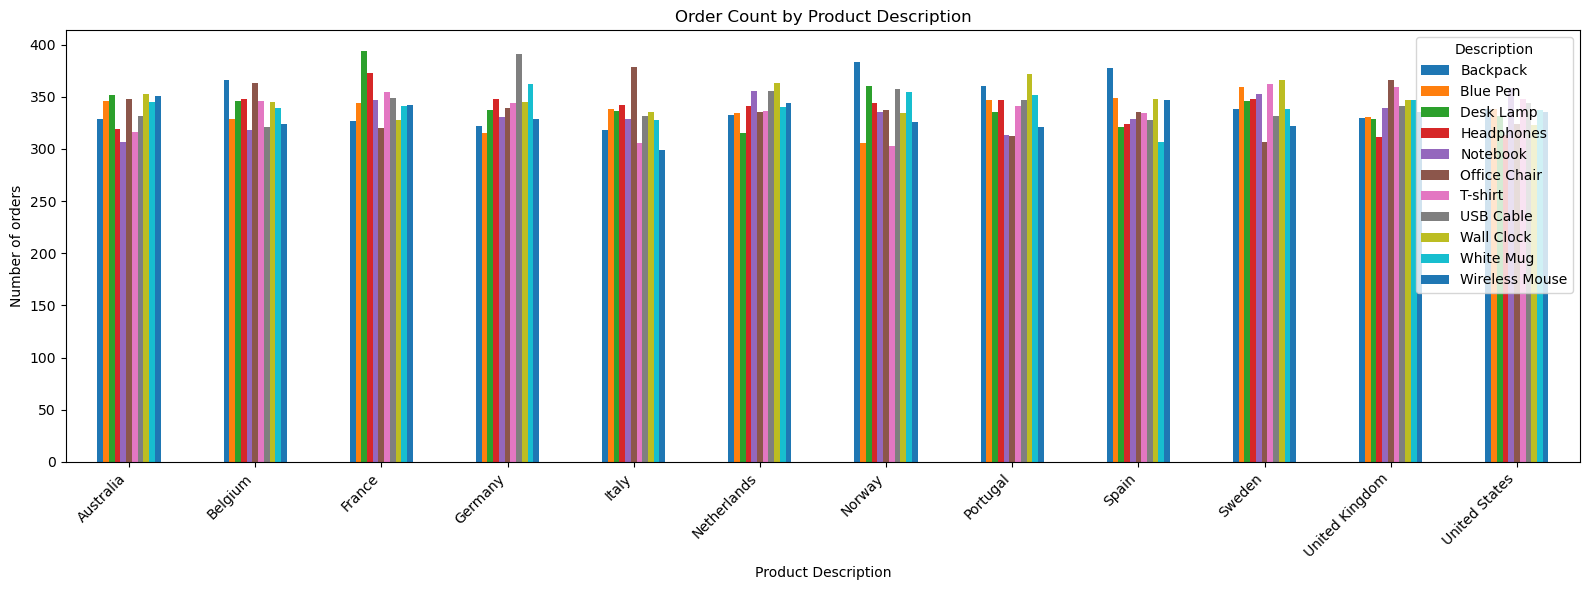

In [66]:
product_wise_orders_in_country = df.groupby(['Country','Description'])['InvoiceNo'].count()

product_wise_orders_in_country.unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Order Count by Product Description')
plt.xlabel('Product Description')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

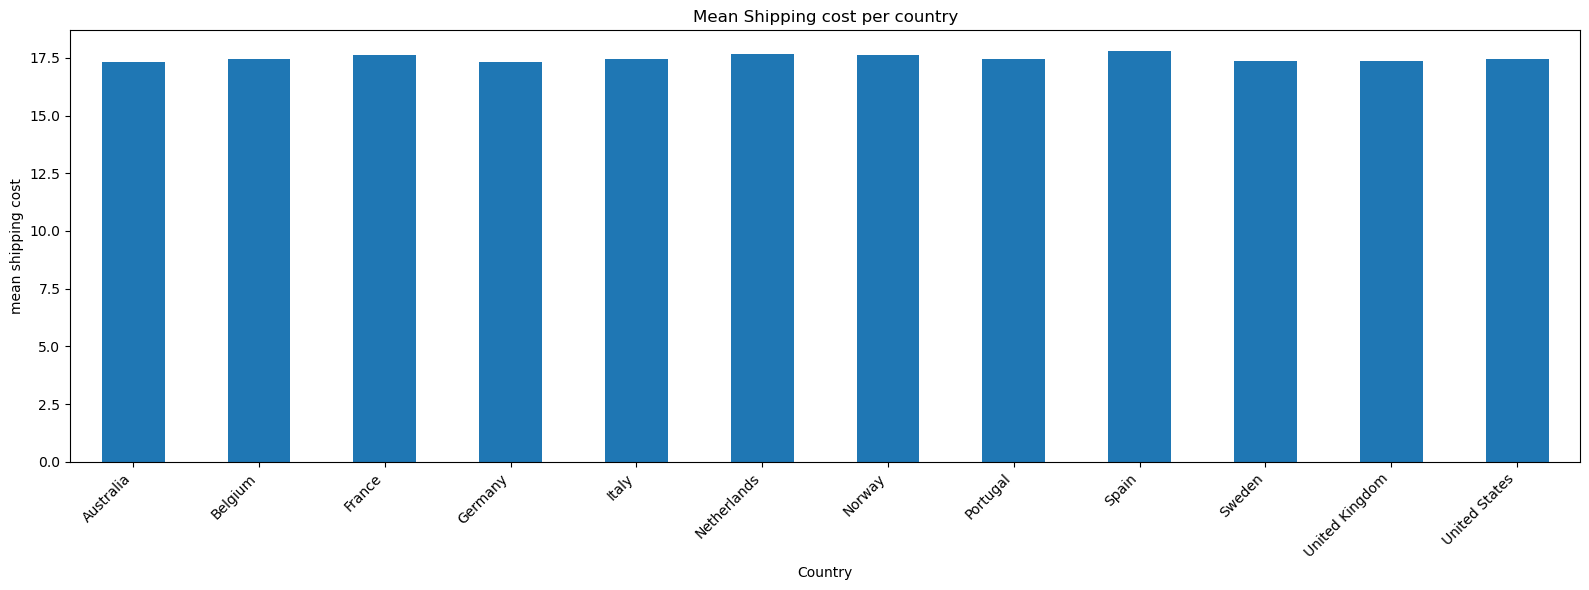

In [67]:
country_wise_shippingCost = df.groupby('Country')['ShippingCost'].mean()

country_wise_shippingCost.plot(kind='bar', figsize=(16, 6))
plt.title('Mean Shipping cost per country')
plt.xlabel('Country')
plt.ylabel('mean shipping cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

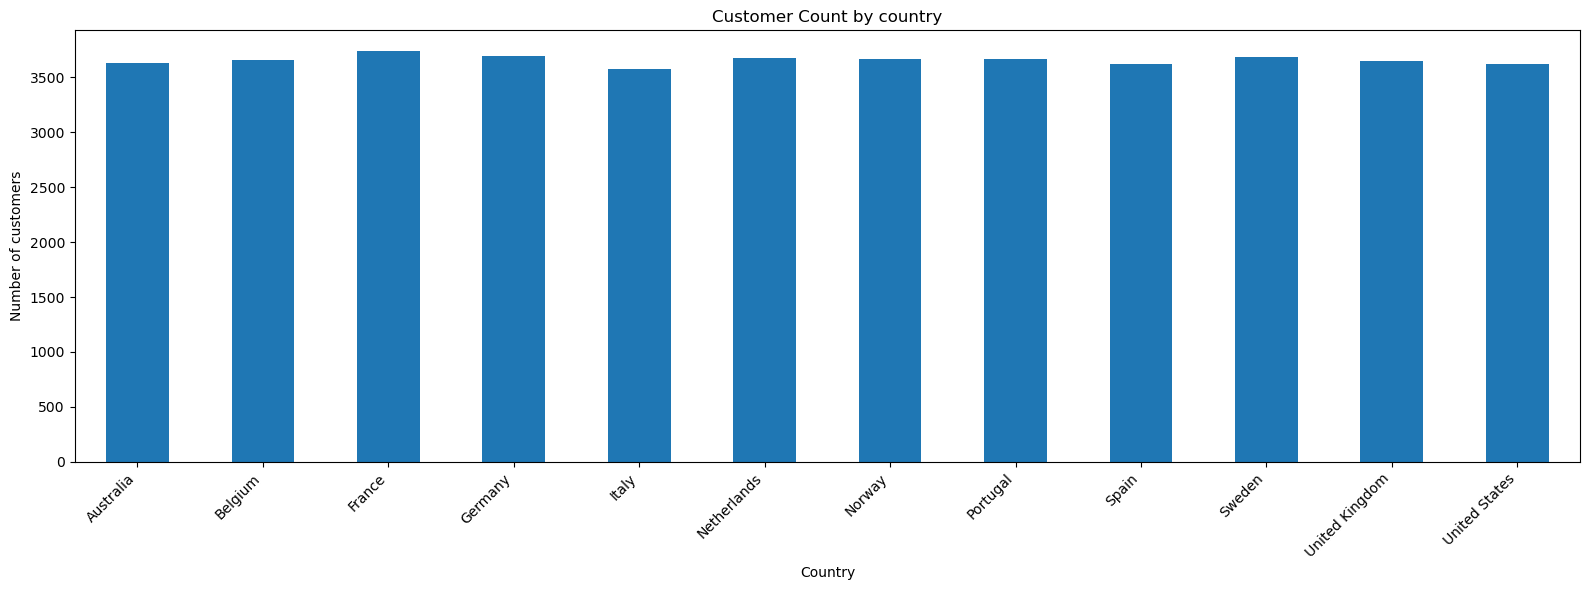

In [68]:
country_wise_customer_count = df.groupby('Country')['CustomerID'].nunique()

country_wise_customer_count.plot(kind='bar', figsize=(16, 6))
plt.title('Customer Count by country')
plt.xlabel('Country')
plt.ylabel('Number of customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyzing Order Trends Over Time

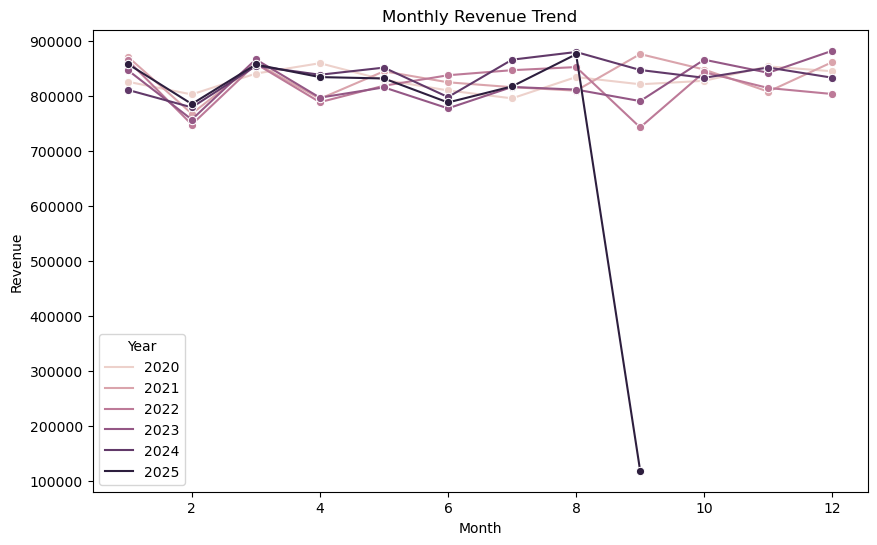

In [53]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year and month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Aggregate monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Line plot of monthly revenue trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', hue='Year', marker='o')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.title('Monthly Revenue Trend')
plt.show()

### Monthly Analysis

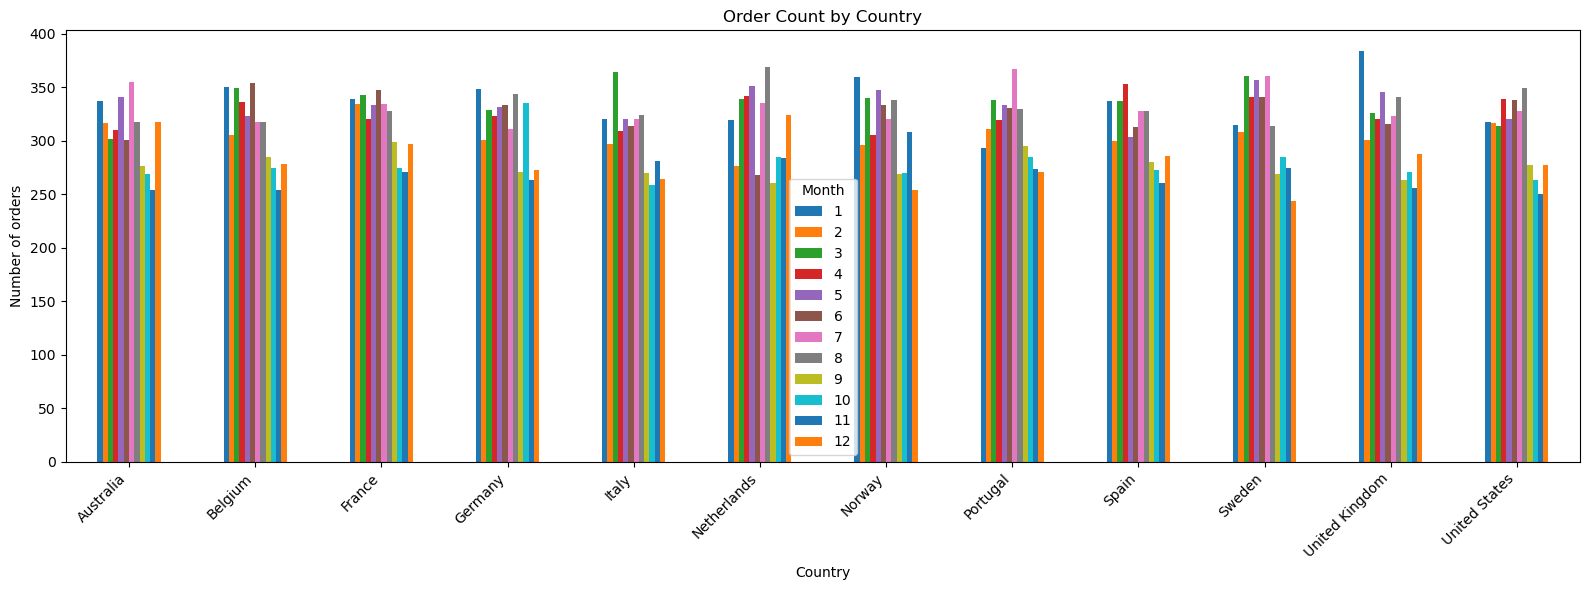

In [69]:
country_wise_monthly_orders = df.groupby(['Country','Month'])['InvoiceNo'].count()

country_wise_monthly_orders.unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Order Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

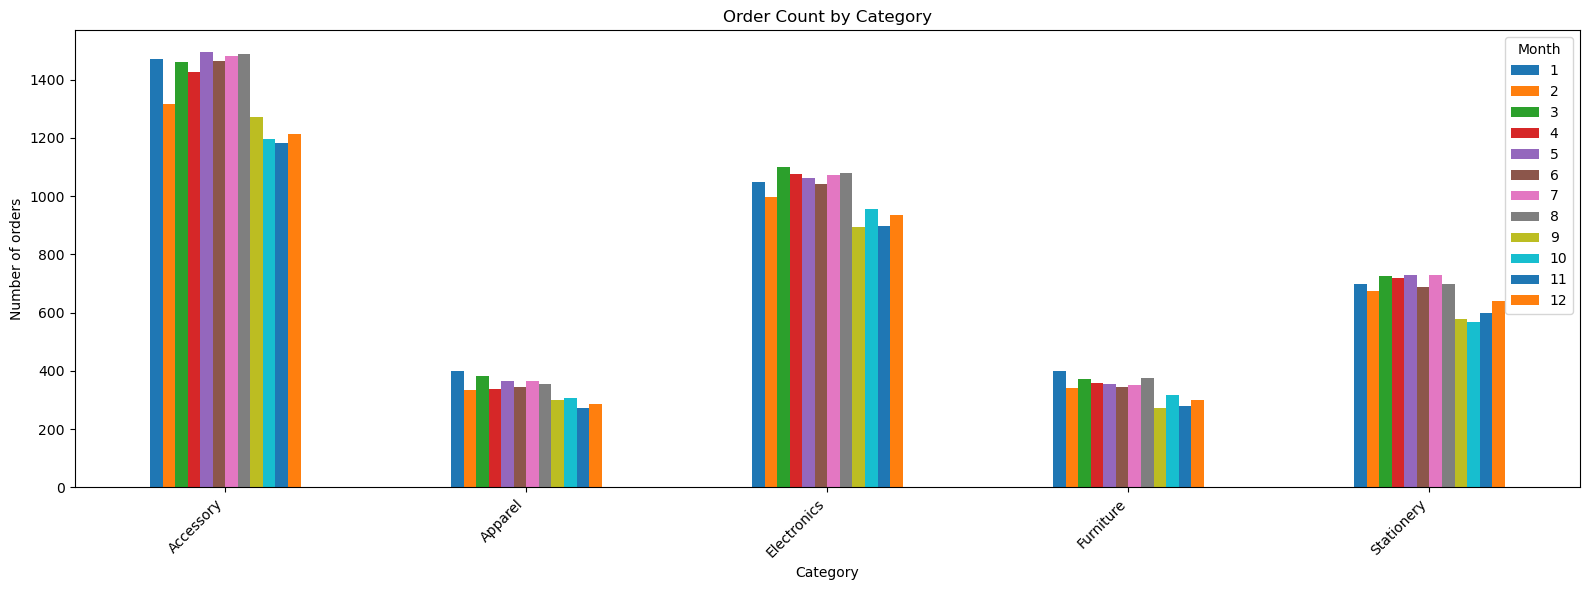

In [70]:
category_wise_monthly_orders = df.groupby(['Category','Month'])['InvoiceNo'].count()

category_wise_monthly_orders.unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Order Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

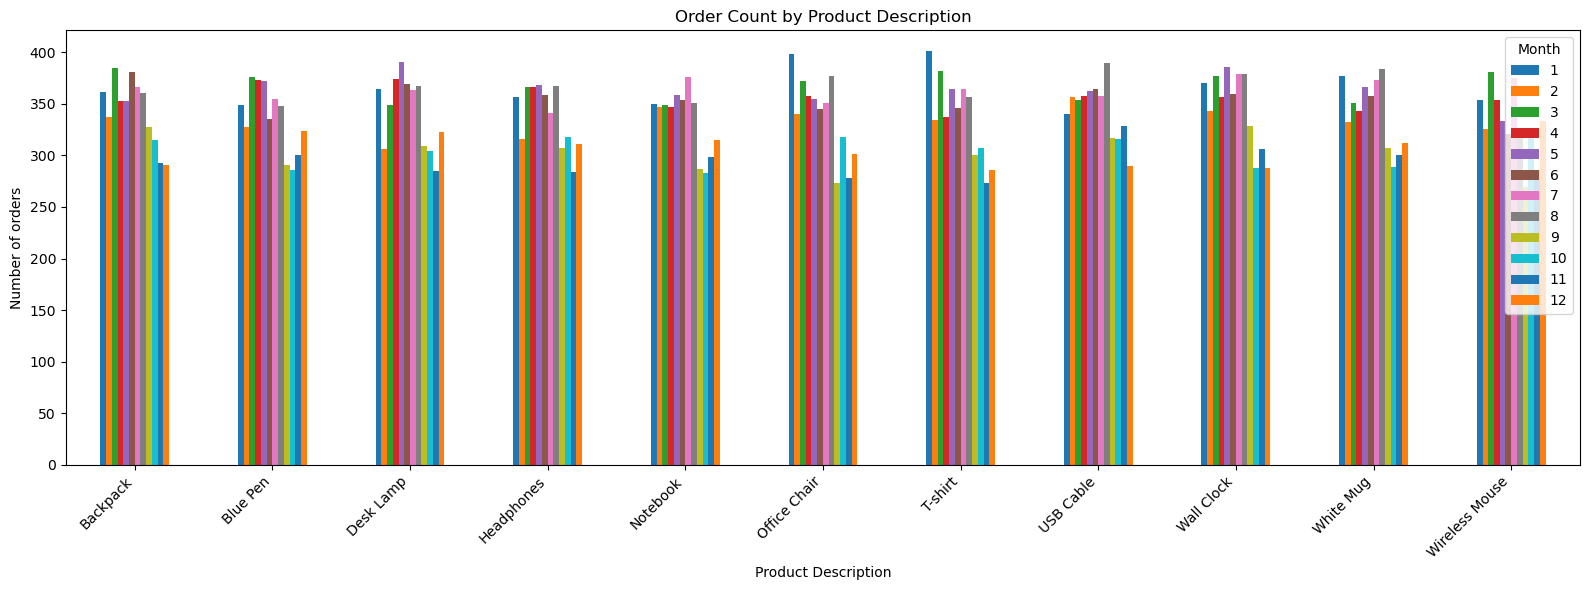

In [71]:
product_wise_monthly_orders = df.groupby(['Description','Month'])['InvoiceNo'].count()

product_wise_monthly_orders.unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Order Count by Product Description')
plt.xlabel('Product Description')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Customer Analysis

Number of unique customers: 35389
Average revenue per customer: $1593.75


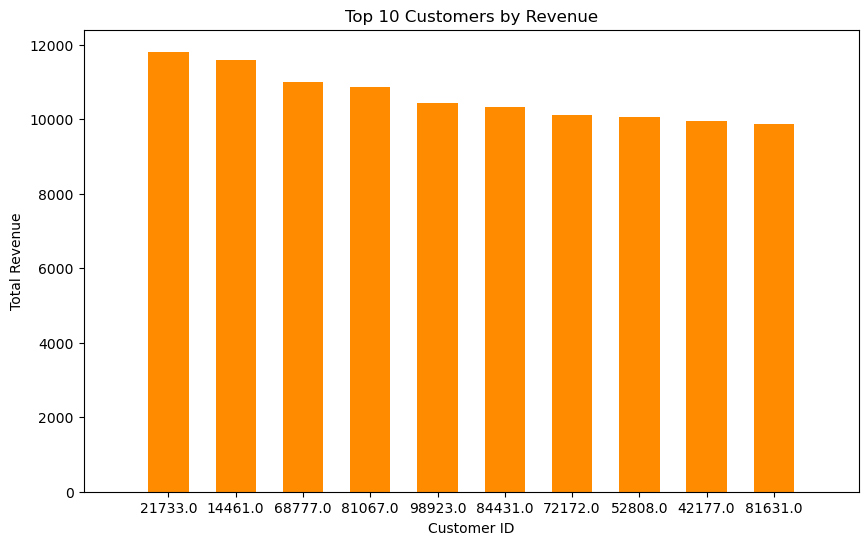

In [54]:
# Assuming df is your DataFrame
unique_customers = df['CustomerID'].nunique()
avg_revenue_per_customer = df.groupby('CustomerID')['Revenue'].sum().mean()
print(f"Number of unique customers: {unique_customers}")
print(f"Average revenue per customer: ${avg_revenue_per_customer:.2f}")

# Top 10 customers by revenue
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

# Bar chart of top 10 customers
fig, ax = plt.subplots(figsize=(10, 6))
bar_positions = range(len(top_customers))
bar_width = 0.6  # Adjust the width of the bars
ax.bar(bar_positions, top_customers, color='darkorange', width=bar_width)
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_customers.index, rotation=0)
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Customer ID')
ax.set_title('Top 10 Customers by Revenue')

# Add some space between bars
ax.margins(x=0.1)  # Adjusts the spacing on the x-axis

plt.show()

## A look at categories

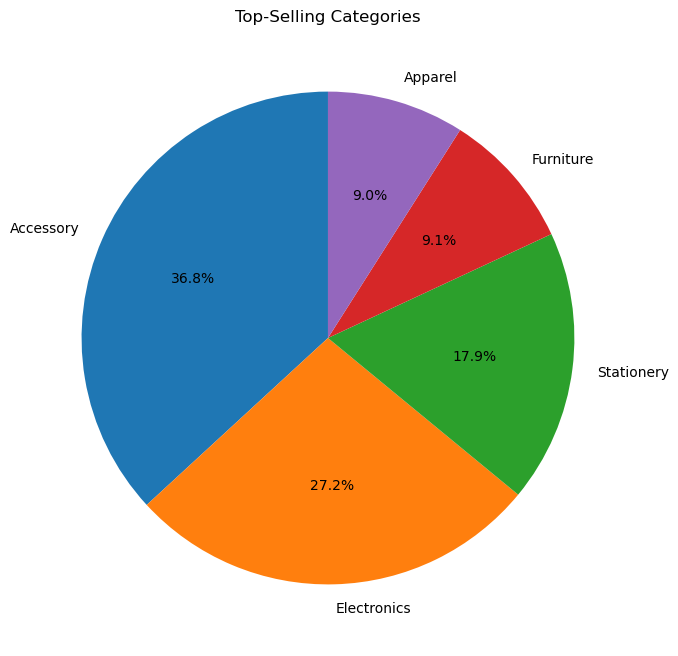

In [57]:
top_categories = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', title='Top-Selling Categories', startangle=90, ylabel="")
plt.show()

## Order Priority

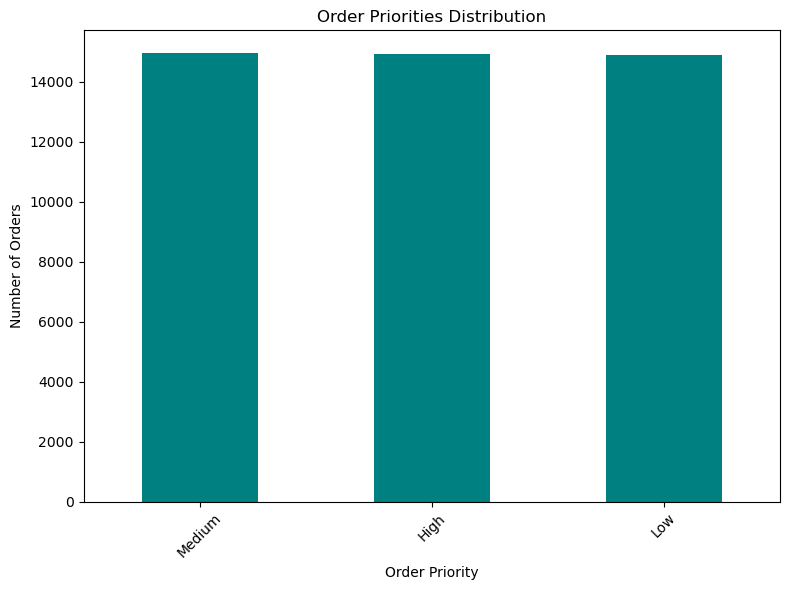

In [7]:
order_priorities = df['OrderPriority'].value_counts()
plt.figure(figsize=(8, 6))
order_priorities.plot(kind='bar', color='teal', title='Order Priorities Distribution')
plt.xlabel('Order Priority')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Shipping Costs

In [58]:
df["ShippingCost"].mean()

17.484206320864207

In [59]:
df.groupby("Country")["ShippingCost"].mean()

Country
Australia         17.324392
Belgium           17.460093
France            17.621382
Germany           17.313032
Italy             17.434459
Netherlands       17.655257
Norway            17.604227
Portugal          17.443192
Spain             17.798519
Sweden            17.339467
United Kingdom    17.378774
United States     17.435992
Name: ShippingCost, dtype: float64

In [60]:
df.groupby(['Country', 'WarehouseLocation'])['ShippingCost'].mean()

Country         WarehouseLocation
Australia       Amsterdam            17.552000
                Berlin               17.602794
                London               16.902107
                Paris                17.084272
                Rome                 17.475958
Belgium         Amsterdam            17.827688
                Berlin               17.337851
                London               17.071129
                Paris                17.770312
                Rome                 17.278636
France          Amsterdam            17.720666
                Berlin               17.431942
                London               17.468304
                Paris                17.627642
                Rome                 17.849557
Germany         Amsterdam            17.560433
                Berlin               17.598890
                London               17.526519
                Paris                16.625657
                Rome                 17.275464
Italy           Amsterdam 

In [61]:
df.groupby(['Country', 'ShipmentProvider'])["ShippingCost"].mean()

Country         ShipmentProvider
Australia       DHL                 17.536893
                FedEx               17.172238
                Royal Mail          17.377303
                UPS                 17.195643
Belgium         DHL                 17.473347
                FedEx               17.611148
                Royal Mail          17.421532
                UPS                 17.336613
France          DHL                 17.469732
                FedEx               17.771627
                Royal Mail          17.458444
                UPS                 17.782460
Germany         DHL                 17.304727
                FedEx               17.000807
                Royal Mail          17.751657
                UPS                 17.223085
Italy           DHL                 17.349293
                FedEx               17.307980
                Royal Mail          17.849045
                UPS                 17.227359
Netherlands     DHL                 17.640388
 

In [62]:
df.groupby(['OrderPriority', 'ShipmentProvider'])["ShippingCost"].mean()

OrderPriority  ShipmentProvider
High           DHL                 17.501845
               FedEx               17.664167
               Royal Mail          17.616418
               UPS                 17.382828
Low            DHL                 17.424242
               FedEx               17.628649
               Royal Mail          17.482424
               UPS                 17.619610
Medium         DHL                 17.423077
               FedEx               17.374501
               Royal Mail          17.467481
               UPS                 17.218966
Name: ShippingCost, dtype: float64

<Figure size 1000x600 with 0 Axes>

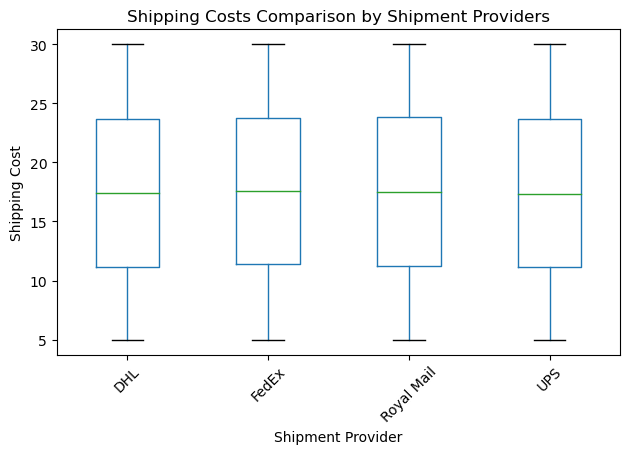

In [72]:
#shipping cost distribution by shipment provider
plt.figure(figsize=(10, 6))
df.boxplot(column='ShippingCost', by='ShipmentProvider', grid=False)
plt.title('Shipping Costs Comparison by Shipment Providers')
plt.suptitle('')  # Remove automatic Pandas boxplot title
plt.xlabel('Shipment Provider')
plt.ylabel('Shipping Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mean Discounts

In [63]:
df.groupby(['Category','Description'])["Discount"].mean()

Category     Description   
Accessory    Backpack          0.252346
             Desk Lamp         0.249015
             Wall Clock        0.250551
             White Mug         0.248709
Apparel      T-shirt           0.251852
Electronics  Headphones        0.248248
             USB Cable         0.251462
             Wireless Mouse    0.251351
Furniture    Office Chair      0.252659
Stationery   Blue Pen          0.250768
             Notebook          0.248224
Name: Discount, dtype: float64

## Conclusion

This analysis of online sales data provides insights into various aspects of business performance. By evaluating product quantities and revenue, we identified high-performing items and overall sales trends. The breakdown by country revealed geographical sales distributions, while yearly and monthly averages highlighted seasonal patterns. Grouping data by category offered a deeper understanding of product performance, and analyzing shipping costs uncovered opportunities to optimize logistics.

To further improve this analysis, filtering the data more granularly—such as by specific time frames or locations—could uncover more specific strengths and weaknesses. These additional insights would help businesses refine strategies even further, driving targeted improvements and sustained growth in online sales.